## Setup

In [1]:
%load_ext rpy2.ipython
%load_ext autoreload
%autoreload 2

%matplotlib inline  
from matplotlib import rcParams
rcParams['figure.figsize'] = (16, 100)

import warnings
from rpy2.rinterface import RRuntimeWarning
warnings.filterwarnings("ignore") # Ignore all warnings
# warnings.filterwarnings("ignore", category=RRuntimeWarning) # Show some warnings

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from IPython.display import display, HTML

In [2]:
%%javascript
// Disable auto-scrolling
IPython.OutputArea.prototype._should_scroll = function(lines) {
    return false;
}

<IPython.core.display.Javascript object>

In [7]:
%%R

install.packages('tidycensus')

--- Please select a CRAN mirror for use in this session ---
Secure CRAN mirrors 

 1: 0-Cloud [https]
 2: Australia (Canberra) [https]
 3: Australia (Melbourne 1) [https]
 4: Australia (Melbourne 2) [https]
 5: Austria (Wien 1) [https]
 6: Belgium (Brussels) [https]
 7: Brazil (PR) [https]
 8: Brazil (SP 1) [https]
 9: Brazil (SP 2) [https]
10: Bulgaria [https]
11: Canada (MB) [https]
12: Canada (ON 1) [https]
13: Canada (ON 2) [https]
14: Chile (Santiago) [https]
15: China (Beijing 2) [https]
16: China (Beijing 3) [https]
17: China (Hefei) [https]
18: China (Hong Kong) [https]
19: China (Jinan) [https]
20: China (Lanzhou) [https]
21: China (Nanjing) [https]
22: China (Shanghai 2) [https]
23: China (Shenzhen) [https]
24: China (Wuhan) [https]
25: Colombia (Cali) [https]
26: Costa Rica [https]
27: Cyprus [https]
28: Czech Republic [https]
29: Denmark [https]
30: East Asia [https]
31: Ecuador (Cuenca) [https]
32: France (Lyon 1) [https]
33: France (Lyon 2) [https]
34: France (Marseille) 

Selection:  66



The downloaded binary packages are in
	/var/folders/mb/f5zh4qyd6sbf171lrlnmff040000gn/T//Rtmp424BUT/downloaded_packages


also installing the dependencies ‘proxy’, ‘e1071’, ‘wk’, ‘classInt’, ‘s2’, ‘Rcpp’, ‘sf’, ‘tigris’, ‘units’

trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.4/proxy_0.4-27.tgz'
Content type 'application/x-gzip' length 196898 bytes (192 KB)
downloaded 192 KB

trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.4/e1071_1.7-16.tgz'
Content type 'application/x-gzip' length 663895 bytes (648 KB)
downloaded 648 KB

trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.4/wk_0.9.4.tgz'
Content type 'application/x-gzip' length 1972252 bytes (1.9 MB)
downloaded 1.9 MB

trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.4/classInt_0.4-11.tgz'
Content type 'application/x-gzip' length 498763 bytes (487 KB)
downloaded 487 KB

trying URL 'https://cran.wustl.edu/bin/macosx/big-sur-arm64/contrib/4.4/s2_1.1.7.tgz'
Content type 'application/x-gzip' length 11914116 bytes (11.4 MB)
downloaded 11.4 MB

trying URL 'https://cran.wustl.e

## TidyCensus Example

This notebook grabs data from the US Census using the [tidycensus package in R](https://walker-data.com/tidycensus/index.html). Make sure you have installed the `tidyverse` and `tidycensus` packages.

In [8]:
%%R 

library(tidycensus)
library(tidyverse)

# store any shapefiles we grab from the census in ~/Library/Caches/tigris
# in case the government removes the shapefiles FTP server again 😭
options(tigris_use_cache = TRUE)

── Attaching core tidyverse packages ──────────────────────── tidyverse 2.0.0 ──
✔ dplyr     1.1.4     ✔ readr     2.1.5
✔ forcats   1.0.0     ✔ stringr   1.5.1
✔ ggplot2   3.5.1     ✔ tibble    3.2.1
✔ lubridate 1.9.4     ✔ tidyr     1.3.1
✔ purrr     1.0.2     
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
ℹ Use the conflicted package (<http://conflicted.r-lib.org/>) to force all conflicts to become errors


### Step 1 \| Load Census API key from `.env` file

The `.env` file should look like this:

```bash
CENSUS_API_KEY="your-api-key-here"
```

This is what is known as an environment variable. 

We load it below in Python

In [9]:
from dotenv import load_dotenv
load_dotenv() # <- searches for a file named .env and loads the environment variables in it

True

And in this cell we pass the environment variable to tidycensus in R

In [10]:
%%R 

census_api_key(Sys.getenv("CENSUS_API_KEY")) # <- Loads CENSUS_API_KEY from environment variable and sets it in R

To install your API key for use in future sessions, run this function with `install = TRUE`.


### Step 2 \| Figure out what tables you want data from and at what geographic granularity

Use <https://censusreporter.org/> to figure out which tables you want.

-   Scroll to the bottom of the page to see the tables.
-   If you already know the table ID, stick that in the "Explore" section to learn more about that table.

Once you've found the variable or variables you want, you can plug them into this code under `variables`. 

In [11]:
%%R 

# the variable B01003_001 was selectd from the census table 
# for population, which we found in censusreporter here:
# https://censusreporter.org/tables/B01003/

# Here are the various geographies you can use with tidycensus
# https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus

# Get variable from ACS
nyc_census_data <- get_acs(geography = "tract", 
                      state='NY',
                      county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
                      variables = c(
                        population="B01003_001",     # population
                        total_units = "B25001_001",  # housing units
                        med_inc="B19013_001"         # median income
                      ), 
                      year = 2021,
                      survey="acs5",
                      geometry=T)

nyc_census_data


  |======================================================================| 100%
Simple feature collection with 6981 features and 5 fields (with 3 geometries empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
First 10 features:
         GEOID                                       NAME    variable estimate
1  36081014700  Census Tract 147, Queens County, New York  population     2863
2  36081014700  Census Tract 147, Queens County, New York     med_inc    71815
3  36081014700  Census Tract 147, Queens County, New York total_units     1570
4  36047058400   Census Tract 584, Kings County, New York  population     3655
5  36047058400   Census Tract 584, Kings County, New York     med_inc    67315
6  36047058400   Census Tract 584, Kings County, New York total_units     1498
7  36061006900 Census Tract 69, New York County, New York  population     2450
8  36061006900 Census Tract 69, New York C

Getting data from the 2017-2021 5-year ACS
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'


### Step 3 | Pivot to Wide Format

Pivot from long to wide using `pivot_wider`.

Depending on what you're trying to do, you may want the data in long or wide format. This example pivots the data to wide format, which will help us with mapping later on in the notebook.

In [12]:
%%R 

nyc_census_data <- nyc_census_data %>% 
  # pivot from wide to long
  pivot_wider(
    names_from=variable, 
    values_from = c(estimate, moe),
    names_glue = "{variable}_{.value}"
  )

nyc_census_data

Simple feature collection with 2327 features and 8 fields (with 1 geometry empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 2,327 × 9
   GEOID    NAME                   geometry population_estimate med_inc_estimate
   <chr>    <chr>        <MULTIPOLYGON [°]>               <dbl>            <dbl>
 1 3608101… Cens… (((-73.9137 40.76548, -7…                2863            71815
 2 3604705… Cens… (((-73.96103 40.59616, -…                3655            67315
 3 3606100… Cens… (((-74.02064 40.73039, -…                2450           237500
 4 3604707… Cens… (((-73.93345 40.6257, -7…                2676           117857
 5 3604710… Cens… (((-73.90735 40.63083, -…                3004            76207
 6 3604705… Cens… (((-73.96279 40.72256, -…                1834           107410
 7 3600502… Cens… (((-73.92012 40.83759, -…                4030            37200
 8 3608104… Cens… (((-73

### Step 4 | Do calculations with `mutate`

In R, you can use `mutate` to create new columns or modify existing ones.

In this example, we create a column called `borough` by extracting the borough from the `NAME` column.

_(hint, I used GitHub Copilot -- a tool similar to ChatGPT -- to do this...see my prompt in the comments)_

In [14]:
%%R 

# Extract borough name from NAME by splitting strings like 
# "Census Tract 147, Queens County, New York" 
# on commas and extracting the second to last element

nyc_census_data <- nyc_census_data %>% 
    mutate(
        borough = str_split(NAME, ",") %>% map_chr(2) %>% str_trim(),
        units_per_person = total_units_estimate / population_estimate
    )

nyc_census_data

Simple feature collection with 2327 features and 10 fields (with 1 geometry empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 2,327 × 11
   GEOID    NAME                   geometry population_estimate med_inc_estimate
 * <chr>    <chr>        <MULTIPOLYGON [°]>               <dbl>            <dbl>
 1 3608101… Cens… (((-73.9137 40.76548, -7…                2863            71815
 2 3604705… Cens… (((-73.96103 40.59616, -…                3655            67315
 3 3606100… Cens… (((-74.02064 40.73039, -…                2450           237500
 4 3604707… Cens… (((-73.93345 40.6257, -7…                2676           117857
 5 3604710… Cens… (((-73.90735 40.63083, -…                3004            76207
 6 3604705… Cens… (((-73.96279 40.72256, -…                1834           107410
 7 3600502… Cens… (((-73.92012 40.83759, -…                4030            37200
 8 3608104… Cens… (((-

### Step 5 | Example Plots

Let's practice with histograms

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 131 rows containing non-finite outside the scale range (`stat_bin()`). 



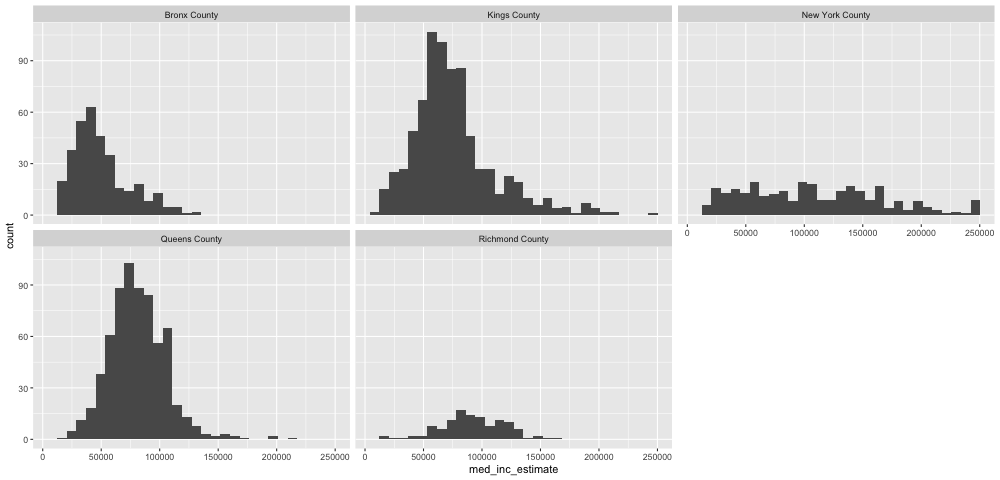

In [15]:
%%R -w 1000

ggplot(nyc_census_data) + 
    aes(x=med_inc_estimate) +
    geom_histogram() + 
    facet_wrap(~borough) 

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 131 rows containing non-finite outside the scale range
(`stat_boxplot()`). 

R[write to console]: 2: Removed 131 rows containing missing values or values outside the scale range
(`geom_point()`). 



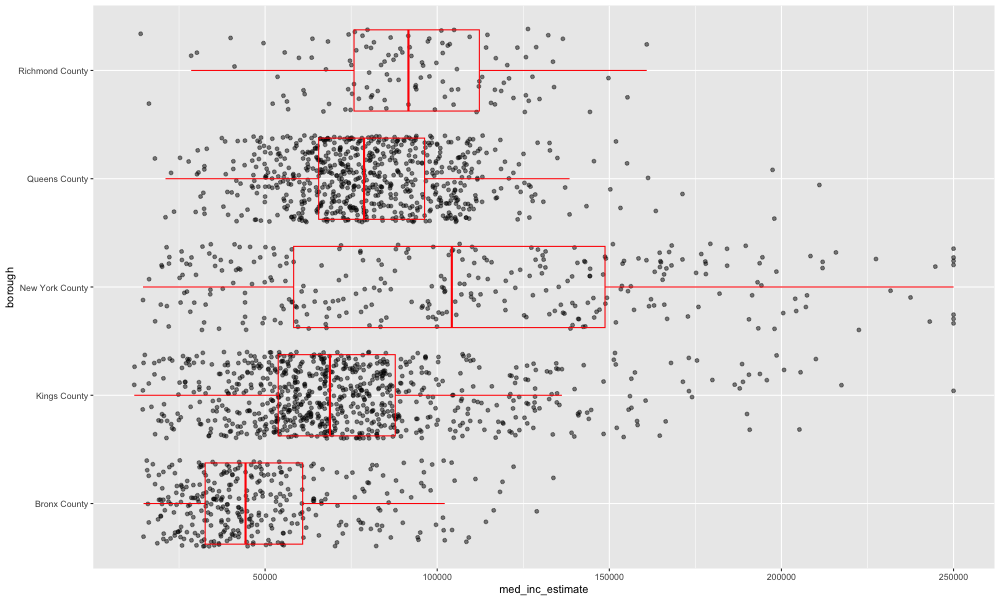

In [16]:
%%R -w 1000 -h 600

ggplot(nyc_census_data) + 
    aes(x=med_inc_estimate, y=borough) +
    geom_jitter(alpha=0.5) + 
    # overlay a box and whisker plot that is transparent with no outliers and is red
    geom_boxplot(fill=NA, outlier.shape=NA, color="red") 

### Step 6 \| Example Map

See more details about making maps here:

https://walker-data.com/tidycensus/articles/spatial-data.html

In [17]:
%%R 

library(tigris)

# remove water from the shapefiles
# https://walker-data.com/tidycensus/articles/spatial-data.html
nyc_census_data <- nyc_census_data %>% 
    erase_water()

To enable caching of data, set `options(tigris_use_cache = TRUE)`
in your R script or .Rprofile.
Fetching area water data for your dataset's location...
Erasing water area...
If this is slow, try a larger area threshold value.


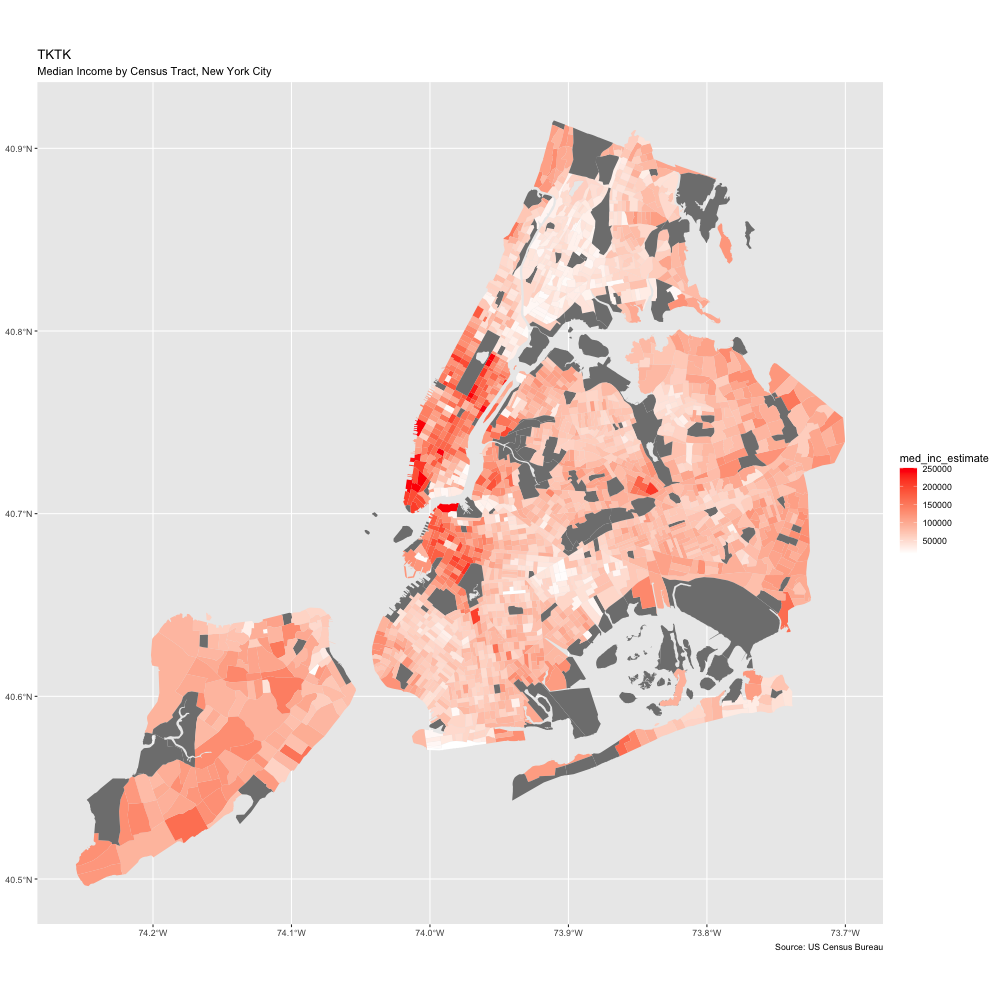

In [18]:
%%R -w 1000 -h 1000

nyc_census_data %>%
  ggplot(aes(fill = med_inc_estimate)) + 
  geom_sf(color = NA) + 
  scale_fill_gradient(low="white", high="red") + 
  labs(
    title = "TKTK",
    subtitle = "Median Income by Census Tract, New York City",
    caption = "Source: US Census Bureau"
  )


## Step 7 | Your Turn - Pick a different geography

- 👉 Here are the various [geographies you can use with tidycensus](https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus). Try changing the analysis from the census tract level to the something more granular like `block group`. What do you notice that you didn't when looking at the tract-level data?

    **hint**: If you select block group, you may have to modify the code in **step 5** 
    > 
    > When you ask for **census tracts**, the NAME variable looks like this `Census Tract 147, Queens County, New York`
    >
    > The code in step 5 is currently set up to split on commas and take the second item (in this case `Queens County`).
    >
    > ```r
    >   nyc_census_data <- nyc_census_data %>% 
    >        mutate(
    >        borough = str_split(NAME, ",") %>% map_chr(2) %>% str_trim(),
    >    ) 
    >
    >    nyc_census_data
    >```
    >
    >But when you ask for data by **block group**, the `NAME` variable looks like this `Block Group 0, Census Tract 135.02, New York County, New York`. 
    >
    >So you will have to modify the code to extract the borough from the **block group** rather than the **census tract** name.
    

## Step 8 | Your Turn - Explore: Pick a your own variable or variables and geography level


- 👉 Pick a different variable other than median income and re-run the notebook. Use [https://censusreporter.org/](https://censusreporter.org) figure out what variable or variables you'd like to explore and add them to the list in **step 2**. 

    
    *hint*: Remember, you can create new columns in **step 5** using `mutate`. For example, the following code would both split the census tract out of the NAME column, and also 

    ```r
    nyc_census_data <- nyc_census_data %>% 
        mutate(
            borough = str_split(NAME, ",") %>% map_chr(2) %>% str_trim(),
            units_per_person = total_unitstotal_units_estimate / population_estimate
        ) 

    nyc_census_data
    ```



In [36]:
%%R 

# the variable B01003_001 was selectd from the census table 
# for population, which we found in censusreporter here:
# https://censusreporter.org/tables/B01003/

# Here are the various geographies you can use with tidycensus
# https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus

# Get variable from ACS
nyc_census_data <- get_acs(geography = "congressional district", 
                                 state='NY',
                                 #county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
                                 variables = c(
                                     population="B01003_001",     # population
                                     total_units = "B25001_001",  # housing units
                                     med_inc="B19013_001"         # median income
                                 ), 
                                 year = 2020,
                                 survey="acs5",
                                 #sumfile="pl",
                                 geometry=T)

nyc_census_data


Simple feature collection with 81 features and 5 fields
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -79.76215 ymin: 40.4961 xmax: -71.85621 ymax: 45.01585
Geodetic CRS:  NAD83
First 10 features:
   GEOID                                                 NAME    variable
1   3626 Congressional District 26 (116th Congress), New York  population
2   3626 Congressional District 26 (116th Congress), New York     med_inc
3   3626 Congressional District 26 (116th Congress), New York total_units
4   3603  Congressional District 3 (116th Congress), New York  population
5   3603  Congressional District 3 (116th Congress), New York     med_inc
6   3603  Congressional District 3 (116th Congress), New York total_units
7   3621 Congressional District 21 (116th Congress), New York  population
8   3621 Congressional District 21 (116th Congress), New York     med_inc
9   3621 Congressional District 21 (116th Congress), New York total_units
10  3611 Congressional District 11 (116th 

Getting data from the 2016-2020 5-year ACS
Using FIPS code '36' for state 'NY'


In [25]:
%%R 

nyc_census_data <- nyc_census_data %>% 
  # pivot from wide to long
  pivot_wider(
    names_from=variable, 
    values_from = c(estimate, moe),
    names_glue = "{variable}_{.value}"
  )

nyc_census_data

Simple feature collection with 2327 features and 8 fields (with 1 geometry empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25609 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 2,327 × 9
   GEOID    NAME                   geometry population_estimate med_inc_estimate
   <chr>    <chr>        <MULTIPOLYGON [°]>               <dbl>            <dbl>
 1 3608101… Cens… (((-73.9137 40.76548, -7…                2863            71815
 2 3604705… Cens… (((-73.96103 40.59616, -…                3655            67315
 3 3606100… Cens… (((-74.02064 40.73039, -…                2450           237500
 4 3604707… Cens… (((-73.93345 40.6257, -7…                2676           117857
 5 3604710… Cens… (((-73.90735 40.63083, -…                3004            76207
 6 3604705… Cens… (((-73.96279 40.72256, -…                1834           107410
 7 3600502… Cens… (((-73.92012 40.83759, -…                4030            37200
 8 3608104… Cens… (((-73

In [37]:
%%R 

# the variable B01003_001 was selectd from the census table 
# for population, which we found in censusreporter here:
# https://censusreporter.org/tables/B01003/

# Here are the various geographies you can use with tidycensus
# https://walker-data.com/tidycensus/articles/basic-usage.html#geography-in-tidycensus

# Get variable from ACS
nyc_census_data <- get_acs(geography = "block group", 
                                 state='NY',
                                 county = c("New York", "Kings", "Queens", "Bronx", "Richmond"),
                                 variables = c(
                                     population="B01003_001",     # population
                                     total_units = "B25001_001",  # housing units
                                     med_inc="B19013_001"         # median income
                                 ), 
                                 year = 2020,
                                 survey="acs5",
                                 #sumfile="pl",
                                 geometry=T)

nyc_census_data


  |======================================================================| 100%
Simple feature collection with 20421 features and 5 fields (with 282 geometries empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25563 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
First 10 features:
          GEOID                                                     NAME
1  360471128001 Block Group 1, Census Tract 1128, Kings County, New York
2  360471128001 Block Group 1, Census Tract 1128, Kings County, New York
3  360471128001 Block Group 1, Census Tract 1128, Kings County, New York
4  360470902001  Block Group 1, Census Tract 902, Kings County, New York
5  360470902001  Block Group 1, Census Tract 902, Kings County, New York
6  360470902001  Block Group 1, Census Tract 902, Kings County, New York
7  360471164003 Block Group 3, Census Tract 1164, Kings County, New York
8  360471164003 Block Group 3, Census Tract 1164, Kings County, New York
9  36047116400

Getting data from the 2016-2020 5-year ACS
Using FIPS code '36' for state 'NY'
Using FIPS code '061' for 'New York County'
Using FIPS code '047' for 'Kings County'
Using FIPS code '081' for 'Queens County'
Using FIPS code '005' for 'Bronx County'
Using FIPS code '085' for 'Richmond County'


In [38]:
%%R 

nyc_census_data <- nyc_census_data %>% 
  # pivot from wide to long
  pivot_wider(
    names_from=variable, 
    values_from = c(estimate, moe),
    names_glue = "{variable}_{.value}"
  )

nyc_census_data

Simple feature collection with 6807 features and 8 fields (with 94 geometries empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25563 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 6,807 × 9
   GEOID    NAME                   geometry population_estimate med_inc_estimate
   <chr>    <chr>        <MULTIPOLYGON [°]>               <dbl>            <dbl>
 1 3604711… Bloc… (((-73.89174 40.66351, -…                 805            55781
 2 3604709… Bloc… (((-73.91748 40.66939, -…                 973            19779
 3 3604711… Bloc… (((-73.88317 40.66956, -…                1267            78304
 4 3604705… Bloc… (((-73.9358 40.59892, -7…                 615            86726
 5 3604705… Bloc… (((-73.9448 40.72168, -7…                 919           141111
 6 3604707… Bloc… (((-73.95899 40.62789, -…                1547            58676
 7 3606102… Bloc… (((-73.92601 40.86357, -…                1658            70257
 8 3604709… Bloc… (((

In [39]:
%%R 

# Extract borough name from NAME by splitting strings like 
# "Census Tract 147, Queens County, New York" 
# on commas and extracting the second to last element

nyc_census_data <- nyc_census_data %>% 
    mutate(
        borough = str_split(NAME, ",") %>% map_chr(3) %>% str_trim(),
        units_per_person = total_units_estimate / population_estimate
    )

nyc_census_data

Simple feature collection with 6807 features and 10 fields (with 94 geometries empty)
Geometry type: MULTIPOLYGON
Dimension:     XY
Bounding box:  xmin: -74.25563 ymin: 40.4961 xmax: -73.70036 ymax: 40.91771
Geodetic CRS:  NAD83
# A tibble: 6,807 × 11
   GEOID    NAME                   geometry population_estimate med_inc_estimate
 * <chr>    <chr>        <MULTIPOLYGON [°]>               <dbl>            <dbl>
 1 3604711… Bloc… (((-73.89174 40.66351, -…                 805            55781
 2 3604709… Bloc… (((-73.91748 40.66939, -…                 973            19779
 3 3604711… Bloc… (((-73.88317 40.66956, -…                1267            78304
 4 3604705… Bloc… (((-73.9358 40.59892, -7…                 615            86726
 5 3604705… Bloc… (((-73.9448 40.72168, -7…                 919           141111
 6 3604707… Bloc… (((-73.95899 40.62789, -…                1547            58676
 7 3606102… Bloc… (((-73.92601 40.86357, -…                1658            70257
 8 3604709… Bloc… (

`stat_bin()` using `bins = 30`. Pick better value with `binwidth`.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 1102 rows containing non-finite outside the scale range (`stat_bin()`). 



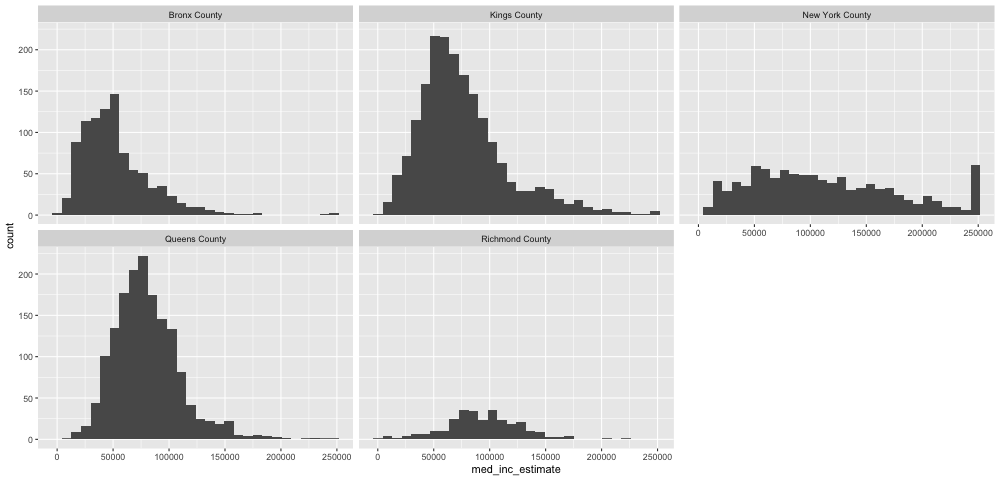

In [40]:
%%R -w 1000

ggplot(nyc_census_data) + 
    aes(x=med_inc_estimate) +
    geom_histogram() + 
    facet_wrap(~borough) 

R[write to console]: In addition: 
R[write to console]: Warning messages:

R[write to console]: 1: Removed 1102 rows containing non-finite outside the scale range
(`stat_boxplot()`). 

R[write to console]: 2: Removed 1102 rows containing missing values or values outside the scale range
(`geom_point()`). 



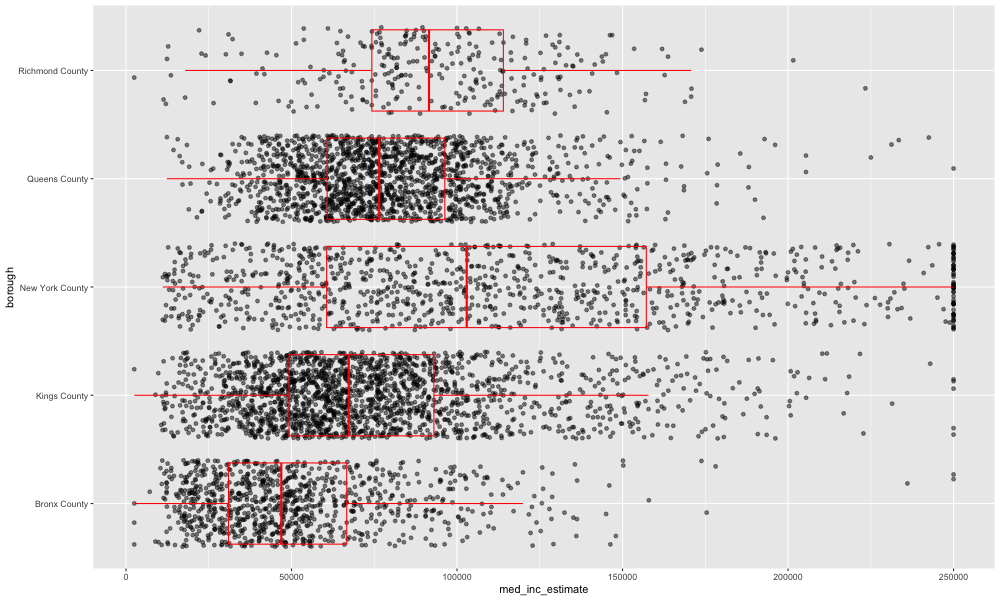

In [41]:
%%R -w 1000 -h 600

ggplot(nyc_census_data) + 
    aes(x=med_inc_estimate, y=borough) +
    geom_jitter(alpha=0.5) + 
    # overlay a box and whisker plot that is transparent with no outliers and is red
    geom_boxplot(fill=NA, outlier.shape=NA, color="red") 

In [42]:
%%R 

library(tigris)

# remove water from the shapefiles
# https://walker-data.com/tidycensus/articles/spatial-data.html
nyc_census_data <- nyc_census_data %>% 
    erase_water()

Fetching area water data for your dataset's location...
Erasing water area...
If this is slow, try a larger area threshold value.


R[write to console]: In addition: 
R[write to console]: Warning message:

R[write to console]: Removed 8 rows containing missing values or values outside the scale range
(`geom_sf()`). 



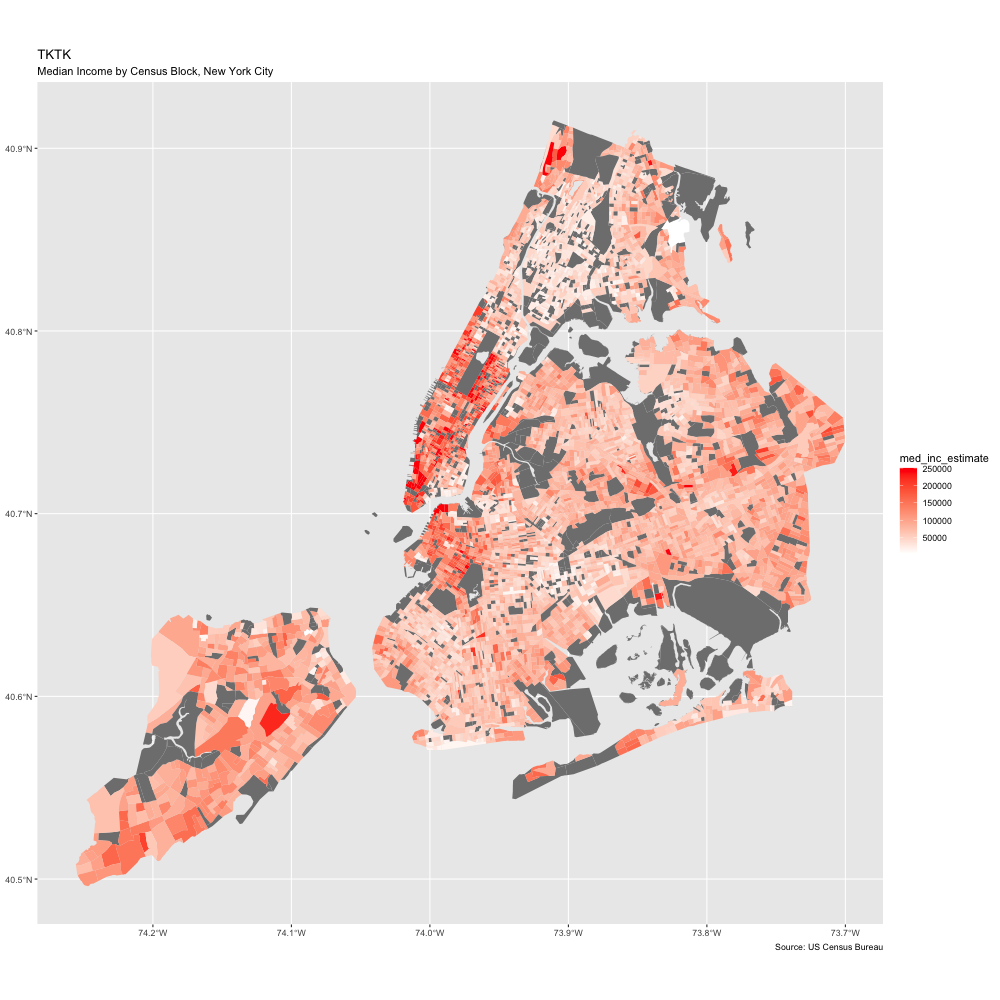

In [44]:
%%R -w 1000 -h 1000

nyc_census_data %>%
  ggplot(aes(fill = med_inc_estimate)) + 
  geom_sf(color = NA) + 
  scale_fill_gradient(low="white", high="red") + 
  labs(
    title = "TKTK",
    subtitle = "Median Income by Census Block, New York City",
    caption = "Source: US Census Bureau"
  )


In [ ]:
%%R -w 1000

ggplot(nyc_census_data) + 
    aes(x=med_inc_estimate) +
    geom_histogram() + 
    facet_wrap(~borough) 

-  👉 Describe the output, what questions does this raise for you?

Why are there some discrepancies in median income level between some of the same locations based on whether they are classified in census tracts or blocks? such as a rich area in Staten Island  

-  👉 Do your conclusions or questions change if you pick a different geography?

Not generally, but yes at a micro level